In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json
from tqdm import tqdm
from typing import Generator

## Convert JSON Data into CSV file

In [ ]:
DATASET_PATH = "/content/drive/MyDrive/Colab Notebooks/Arxiv Topic Classification/arxiv-metadata-oai-snapshot.json"

In [ ]:
def get_dataset_generator(path: str) -> Generator:
    with open(path, "r") as fp:
        for line in fp:
            row = json.loads(line)
            yield row


dataset_generator = get_dataset_generator(
    path=DATASET_PATH
)
print(type(dataset_generator))

<class 'generator'>


In [ ]:
def create_dataframe(generator: Generator) -> pd.DataFrame:
    # I'll use this column to filter out paper duplicates.
    titles = []
    authors = []

    abstracts = []
    categories = []
    dates = []

    for row in generator:
        titles.append(row["title"])
        authors.append(row["authors"])

        dates.append(row["update_date"])
        abstracts.append(row["abstract"])
        categories.append(row["categories"])

    return pd.DataFrame.from_dict({
        "title": titles,
        "authors": authors,
        "date": dates,
        "abstract": abstracts,
        "categories": categories
    })


dataset_df = create_dataframe(dataset_generator)
dataset_df["date"] = pd.to_datetime(dataset_df["date"])

In [ ]:
FILE_PATH = "/content/drive/MyDrive/Colab Notebooks/Arxiv Topic Classification/arxiv.csv"
dataset_df.to_csv(FILE_PATH)

## Load the csv dataset

In [55]:
FILE_PATH = "/content/drive/MyDrive/Colab Notebooks/Arxiv Topic Classification/arxiv.csv"
full_data = pd.read_csv(FILE_PATH)

In [56]:
full_data.head()

,Unnamed: 0,title,authors,date,abstract,categories
0,0,Calculation of prompt diphoton production cros...,"C. Bal\'azs, E. L. Berger, P. M. Nadolsky, C.-...",2008-11-26,A fully differential calculation in perturba...,hep-ph
1,1,Sparsity-certifying Graph Decompositions,Ileana Streinu and Louis Theran,2008-12-13,"We describe a new algorithm, the $(k,\ell)$-...",math.CO cs.CG
2,2,The evolution of the Earth-Moon system based o...,Hongjun Pan,2008-01-13,The evolution of Earth-Moon system is descri...,physics.gen-ph
3,3,A determinant of Stirling cycle numbers counts...,David Callan,2007-05-23,We show that a determinant of Stirling cycle...,math.CO
4,4,From dyadic $\Lambda_{\alpha}$ to $\Lambda_{\a...,Wael Abu-Shammala and Alberto Torchinsky,2013-10-15,In this paper we show how to compute the $\L...,math.CA math.FA


In [57]:
full_data.categories.nunique()

77494

In [58]:
print("Number of empty rows in each features")
full_data.isnull().sum()

Number of empty rows in each features


Unnamed: 0    0
title         0
authors       0
date          0
abstract      0
categories    0
dtype: int64

In [63]:
full_data[full_data.title.duplicated()]

,Unnamed: 0,title,authors,date,abstract,categories
2185,2185,Metal and molecule cooling in simulations of s...,"U. Maio, K. Dolag, B. Ciardi, L. Tornatore",2009-06-23,This submission has been withdrawn by arXiv ...,astro-ph
4669,4669,Generating Unexpected Spin Echoes in Dipolar S...,"Dale Li, A. E. Dementyev, Yanqun Dong, R. G. R...",2007-05-23,"NMR spin echo measurements of C-13 in C60, Y...",quant-ph cond-mat.mes-hall
16843,16843,The Computation of All 4R Serial Spherical Wri...,"Damien Chablat (IRCCyN), Jorge Angeles (CIM)",2007-07-26,A spherical wrist of the serial type is said...,cs.RO
17949,17949,Discussion of ``2004 IMS Medallion Lecture: Lo...,"St\'ephan Cl\'emen\c{c}on, G\'abor Lugosi, Nic...",2009-09-29,Discussion of ``2004 IMS Medallion Lecture: ...,q-fin.RM math.ST stat.TH
17972,17972,Discussion of ``2004 IMS Medallion Lecture: Lo...,"Xiaotong Shen, Lifeng Wang",2008-12-02,Discussion of ``2004 IMS Medallion Lecture: ...,q-fin.RM math.ST stat.TH
...,...,...,...,...,...,...
2278974,2278974,Computability Superselection Rule and its phys...,Gavriel Segre,2007-05-23,Paper erroneously re-submitted as duplicte. ...,quant-ph
2279370,2279370,A Proof of the Security of Quantum Key Distrib...,"Eli Biham, Michel Boyer, P. Oscar Boykin, Tal ...",2007-05-23,We prove the security of quantum key distrib...,quant-ph
2279444,2279444,The Super W_3 Conformal Algebra and the Boussi...,Ziemowit Popowicz (Research Institute for Theo...,2009-10-22,The bihamiltonian structure of the N=2 Super...,solv-int nlin.SI
2279467,2279467,Dynamical Systems Accepting the Normal Shift,"R. A. Sharipov (Department of Mathematics, Bas...",2008-02-03,Newtonian dynamical systems accepting the no...,solv-int alg-geom astro-ph gr-qc hep-th math.A...


In [64]:
title_duplicate = full_data["title"].iloc[2185]
print(title_duplicate)

Metal and molecule cooling in simulations of structure formation


In [65]:
deduplicated_data = full_data.drop_duplicates(subset="title", keep="first")

In [66]:
full_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2280354 entries, 0 to 2280353
Data columns (total 6 columns):
 #   Column      Dtype 
---  ------      ----- 
 0   Unnamed: 0  int64 
 1   title       object
 2   authors     object
 3   date        object
 4   abstract    object
 5   categories  object
dtypes: int64(1), object(5)
memory usage: 104.4+ MB


In [67]:
deduplicated_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2276449 entries, 0 to 2280353
Data columns (total 6 columns):
 #   Column      Dtype 
---  ------      ----- 
 0   Unnamed: 0  int64 
 1   title       object
 2   authors     object
 3   date        object
 4   abstract    object
 5   categories  object
dtypes: int64(1), object(5)
memory usage: 121.6+ MB


In [68]:
deduplicated_data.drop("Unnamed: 0", axis = 1, inplace=True)

<ipython-input-68-50d04ed07fb9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  deduplicated_data.drop("Unnamed: 0", axis = 1, inplace=True)


In [69]:
deduplicated_data.head()

,title,authors,date,abstract,categories
0,Calculation of prompt diphoton production cros...,"C. Bal\'azs, E. L. Berger, P. M. Nadolsky, C.-...",2008-11-26,A fully differential calculation in perturba...,hep-ph
1,Sparsity-certifying Graph Decompositions,Ileana Streinu and Louis Theran,2008-12-13,"We describe a new algorithm, the $(k,\ell)$-...",math.CO cs.CG
2,The evolution of the Earth-Moon system based o...,Hongjun Pan,2008-01-13,The evolution of Earth-Moon system is descri...,physics.gen-ph
3,A determinant of Stirling cycle numbers counts...,David Callan,2007-05-23,We show that a determinant of Stirling cycle...,math.CO
4,From dyadic $\Lambda_{\alpha}$ to $\Lambda_{\a...,Wael Abu-Shammala and Alberto Torchinsky,2013-10-15,In this paper we show how to compute the $\L...,math.CA math.FA


In [70]:
FILE_PATH = "/content/drive/MyDrive/Colab Notebooks/Arxiv Topic Classification/deduplicated_arxiv.csv"
deduplicated_data.to_csv(FILE_PATH, index=False)

## Data Analysis and Visualization

In [2]:
FILE_PATH = "/content/drive/MyDrive/Colab Notebooks/Arxiv Topic Classification/deduplicated_arxiv.csv"
data = pd.read_csv(FILE_PATH)

In [3]:
data.head()

,title,authors,date,abstract,categories
0,Calculation of prompt diphoton production cros...,"C. Bal\'azs, E. L. Berger, P. M. Nadolsky, C.-...",2008-11-26,A fully differential calculation in perturba...,hep-ph
1,Sparsity-certifying Graph Decompositions,Ileana Streinu and Louis Theran,2008-12-13,"We describe a new algorithm, the $(k,\ell)$-...",math.CO cs.CG
2,The evolution of the Earth-Moon system based o...,Hongjun Pan,2008-01-13,The evolution of Earth-Moon system is descri...,physics.gen-ph
3,A determinant of Stirling cycle numbers counts...,David Callan,2007-05-23,We show that a determinant of Stirling cycle...,math.CO
4,From dyadic $\Lambda_{\alpha}$ to $\Lambda_{\a...,Wael Abu-Shammala and Alberto Torchinsky,2013-10-15,In this paper we show how to compute the $\L...,math.CA math.FA


In [5]:
# convert the categories into tuple of categories
data["categories"] = data["categories"].apply(lambda categories : tuple(categories.split()))

data["num_categories"] = data["categories"].apply(lambda x : len(x))

In [6]:
data.head()

,title,authors,date,abstract,categories,num_categories
0,Calculation of prompt diphoton production cros...,"C. Bal\'azs, E. L. Berger, P. M. Nadolsky, C.-...",2008-11-26,A fully differential calculation in perturba...,"(hep-ph,)",1
1,Sparsity-certifying Graph Decompositions,Ileana Streinu and Louis Theran,2008-12-13,"We describe a new algorithm, the $(k,\ell)$-...","(math.CO, cs.CG)",2
2,The evolution of the Earth-Moon system based o...,Hongjun Pan,2008-01-13,The evolution of Earth-Moon system is descri...,"(physics.gen-ph,)",1
3,A determinant of Stirling cycle numbers counts...,David Callan,2007-05-23,We show that a determinant of Stirling cycle...,"(math.CO,)",1
4,From dyadic $\Lambda_{\alpha}$ to $\Lambda_{\a...,Wael Abu-Shammala and Alberto Torchinsky,2013-10-15,In this paper we show how to compute the $\L...,"(math.CA, math.FA)",2


In [7]:
# visualize the number of papers per categories
data["num_categories"].describe()

count    2.276449e+06
mean     1.686848e+00
std      9.206593e-01
min      1.000000e+00
25%      1.000000e+00
50%      1.000000e+00
75%      2.000000e+00
max      1.300000e+01
Name: num_categories, dtype: float64

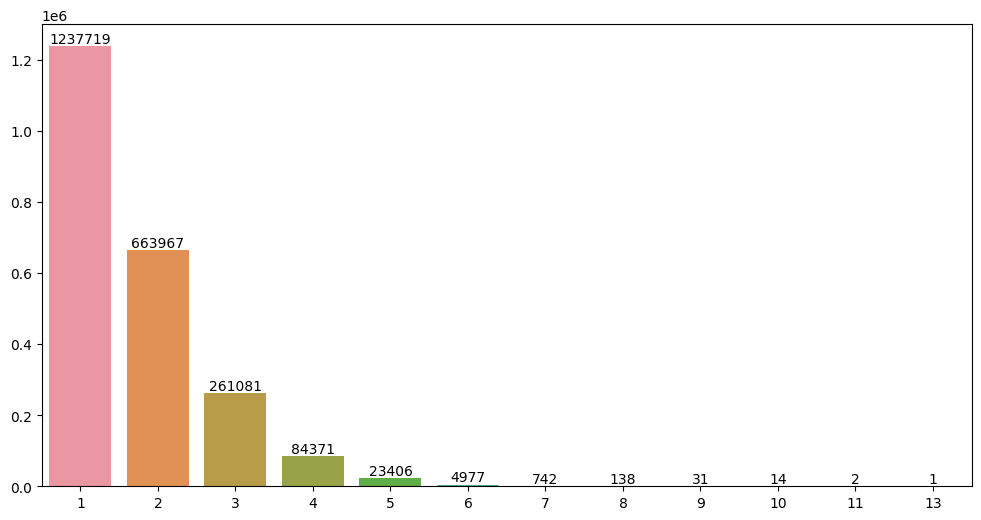

In [9]:
# visualize the number of categoies per paper
count_data = data["num_categories"].value_counts()
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=count_data.index, y=count_data.values)

# Add count values above each bar
for i, count in enumerate(count_data.values):
    ax.annotate(count, (i, count), ha='center', va='bottom')

plt.show()

In [10]:
data[data["num_categories"] == 11]

,title,authors,date,abstract,categories,num_categories
57315,Visco-potential free-surface flows and long wa...,"Denys Dutykh (1) ((1) LAMA, University of Savoie)",2020-02-20,In a recent study [DutykhDias2007] we presen...,"(physics.flu-dyn, math-ph, math.AP, math.MP, m...",11
2026774,Automated Pattern Detection--An Algorithm for ...,Carl S. McTague and James P. Crutchfield,2016-08-31,In the computational-mechanics structural an...,"(cs.CV, cond-mat.stat-mech, cs.CL, cs.DS, cs.I...",11


In [15]:
categories = data["categories"].tolist()

# Getting all unique categories by flattening the 'categories' column
# and creating a set out of the resultant list.
unique_categories = {}
for row in categories:
  for category in row:
    unique_categories[category] = unique_categories.get(category, 0) + 1

print(f"Num. unique categories: {len(unique_categories)}")


# print maximum published and minimum published 5 papers categories
# sort the dictionary based on the value
list_categories = sorted(unique_categories.items(), key = lambda x : x[1])
print("Maximum published")
print(list_categories[-5:])
print("Minimum published")
print(list_categories[:5])


Num. unique categories: 176
Maximum published
[('astro-ph', 104928), ('quant-ph', 136005), ('cs.LG', 143500), ('hep-th', 158697), ('hep-ph', 171480)]
Minimum published
[('bayes-an', 16), ('ao-sci', 17), ('plasm-ph', 38), ('acc-phys', 48), ('atom-ph', 123)]


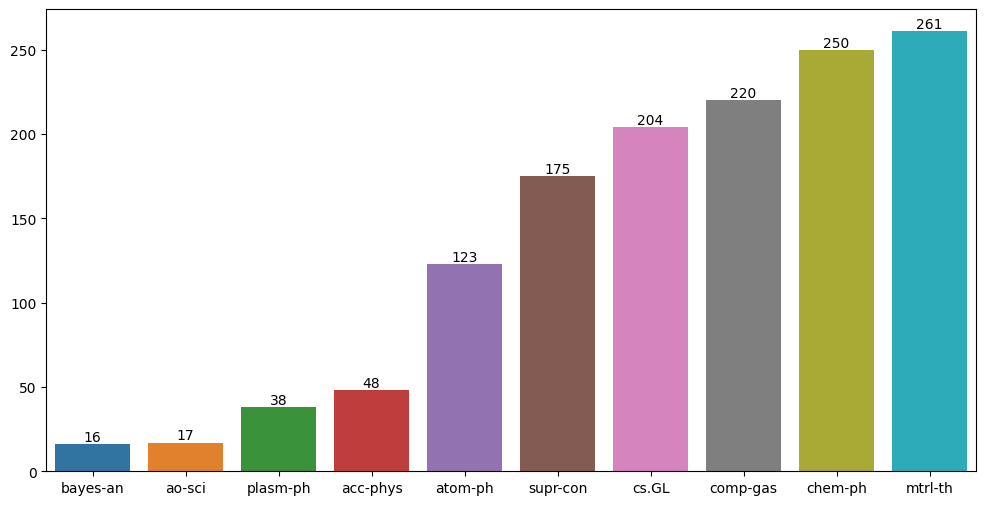

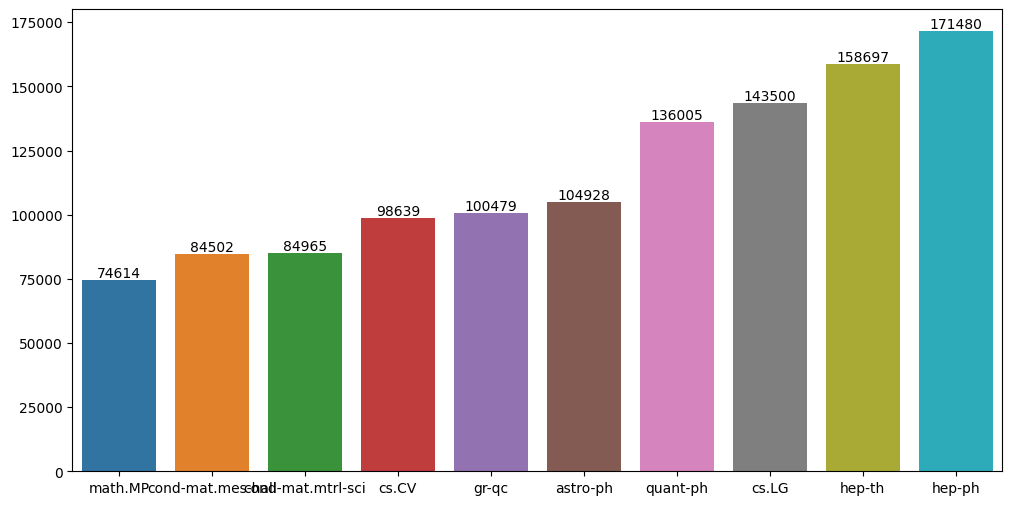

In [32]:
# Visualize top 10 and bottom 10 data of unique categories
labels, counts = zip(*list_categories)
labels, counts = list(labels), list(counts)
NUMBER=10

# Minimum published categories
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=labels[:NUMBER], y=counts[:NUMBER])
for i, count in enumerate(counts[:NUMBER]):
    ax.annotate(count, (i, count), ha='center', va='bottom')

# Maximum published categories
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=labels[-NUMBER:], y=counts[-NUMBER:])
for i, count in enumerate(counts[-NUMBER:]):
    ax.annotate(count, (i, count), ha='center', va='bottom')


plt.show()